<a href="https://colab.research.google.com/github/maikyramon/bootcamp/blob/main/BootCampDataScienceAula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALIZANDO DADOS DA SAÚDE COM PYTHON E PANDAS**

---



**Aula 1: Preparando o ambiente.**

- Buscar dados do TabNet (DATASUS)
    - Acesso ao site do TabNet para buscar os dados do DATASUS. Foram feitas algumas pesquisas e foi baixado o arquivo .csv com os dados 
  Valor de procedimento, separado por unidade de federação.
- upload arquivo de dados pro colab
    - É possível fazer o updload de arquivos para o google colab, porém os arquivos ficam disponíveis enquanto é usado, ao resetar o colab são perdidos.
- ler o arquivo
    - Leitura do arquivo utilizando o read_csv do pandas
    - Erro de UTF8 (encoding): É necessário setar o encoding ao ler o arquivo por conta dos caracteres especiais da língua portuguesa.
    - skiprows e skipfooter: No arquivo baixado há algumas colunas de informações que não serão relevantes por enquanto. Usamos estes comandos para pular estas colunas e não serem carregadas no DataFrame.
    - Separador: informamos qual o separador é utilizado para delimitar os campos
- .head: Comando para exibir as primeiras 5 linhas 
- .tail: Comando para exibir as últimas 5 linhas
- .info: Mostra informações sobre o DataFrame, como espaço utilizado, tipos dos campos, etc.
- pd.options.display: Utilizado para definir configurações do panda, neste exemplo utilizamos para definir os padrões de formatação de números;

**Aula 2: Visualizações**
- Criada visualização plot
  - Configurações do plot: Como configurar os eixos x e y, tamanho do gráfico e tipo (kind)
  - matplotlib: importada nova lib para poder mexer nos eixos, separando o objeto dos eixos em um específico, podemos alterar diretamente.
  - Título: Utilizando o matplotlib podemos alterar o título do gráfico
  - Tickers (valores dos eixos x e y): 
  - importação da biblioteca para formatação dos tickers


  **Entendendo Gráficos** 
  - Slice dos dados pegando pelo index
  - Não permite inserir colunas no index por ser uma série imutavel, para poder inserir deve-se transformar em uma lista com o comando .tolist()
  - Setar uma outra coluna como indice com set_index()
  - Alternar entre as colunas e linhas com .T (transpor) assim as linhas viram colulas e as colunas linhas.
  - plotado o gráfico, porém com uma coluna enorme ao final, que é o Total. Estava "acabando" com o gráfico.
  - Dropada coluna total para corrigir o gráfico.


  **Desafio1: Colocar as legendas fora do plot para melhor visualização**

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Desafio 2: Plotar com apenas 5 estados**
estados = usaveis.T[["11 Rondônia", "12 Acre", "13 Amazonas", "14 Roraima", "15 Pará"]]
estados.plot(figsize=(12,6), grid=True)




**Manipulação de dados**
- usar as Columns e fazer slices para buscar 5 estados
- Transpor e buscar as colunas é o mesmo que pegar o índice!
  
  



In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import cycle, islice

In [218]:
pd.options.display.float_format = "{:.2f}".format

In [219]:
#dados = pd.read_csv('/content/A193403189_28_143_208.csv', engine='python', encoding="ISO-8859-1", skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',')
dados = pd.read_csv('/content/A160324189_28_143_208.csv', engine='python', encoding="ISO-8859-1", skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',')
dados

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,8341

In [220]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [221]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [222]:
dados["2008/Ago"]

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

In [223]:
dados["2008/Ago"].mean()

26636409.892222222

Text(0.5, 1.0, 'Valor por unidade de federação')

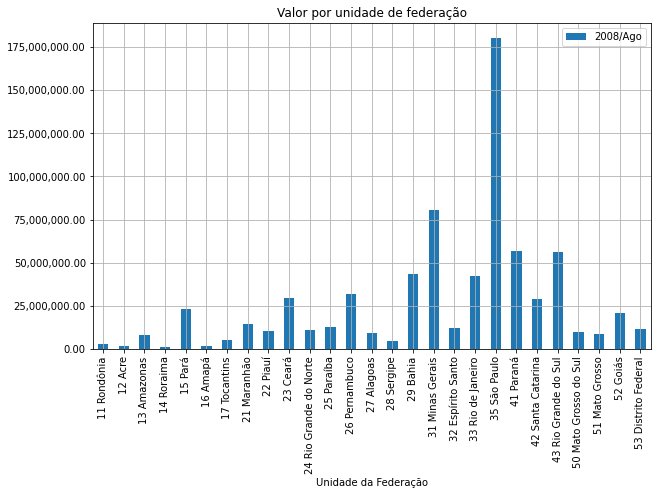

In [224]:
ax = dados.plot(y="2008/Ago", x="Unidade da Federação", kind="bar", figsize=(10,6), grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade de federação")

In [225]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [226]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [227]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [228]:
usaveis = usaveis.set_index("Unidade da Federação")

In [229]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [230]:
usaveis = usaveis.drop("Total", axis=1) 

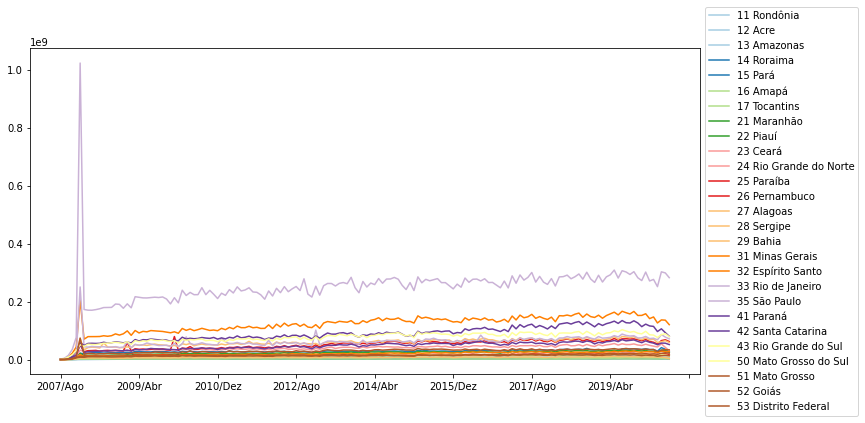

In [231]:
usaveis.T.plot(figsize=(12,6), colormap='Paired')
#df = pandas.DataFrame(x)
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

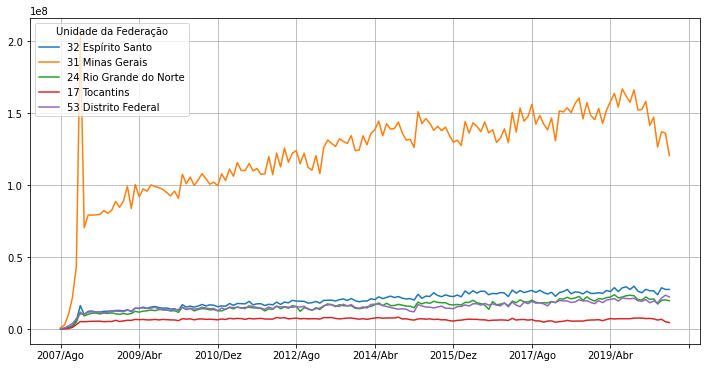

In [232]:
#estados = usaveis.T[["11 Rondônia", "12 Acre", "13 Amazonas", "14 Roraima", "15 Pará"]]
#ou
#estados = usaveis[:5].T         # 5 primeiros
#estados = usaveis.sample(n=5).T # 5 aleatorios
import numpy as np       
np.random.seed(687942)  # a seed é o numero inicial que gera os randomicos, 
                        # setando uma seed é possível reproduzir a mesma sequencia utilizando o sample!

estados = usaveis.sample(n=5).T 
estados.plot(figsize=(12,6), grid=True)

In [233]:
estados_mais_gastaram = usaveis.sample(n=5) #usaveis.columns[:5]
estados_mais_gastaram

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,54104976.28,60195929.05,58296066.50,58362424.47,60181080.42,55168339.49,56655278.59,56069454.96,52426527.16,55200330.53,50094672.65,58796191.84,61160709.55,60093810.34,61237932.18,63709506.55,63061083.41,59354217.40,63961626.64,61553236.70,53908557.78,59452473.88,57176215.74,61547622.60,62756764.33,65813210.22,61817516.05,68759673.19,64503540.72,66075691.36,67767419.13,62635827.71,58210191.51,64546099.76,59549208.75,56709962.09,51179993.45,56843604.33,56503747.99,51764534.76
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,64524506.56,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,19

In [245]:
usaveis["Total"] = usaveis.sum(axis=1)

Unidade da Federação
11 Rondônia               1851145347.64
12 Acre                    841333511.62
13 Amazonas               3533851108.18
14 Roraima                 606971982.90
15 Pará                   8851074961.14
16 Amapá                   581563399.44
17 Tocantins              1995014482.70
21 Maranhão               7243770211.20
22 Piauí                  4245352414.58
23 Ceará                 12365572804.08
24 Rio Grande do Norte    4938471532.78
25 Paraíba                4923883317.26
26 Pernambuco            16026270211.54
27 Alagoas                4195806848.08
28 Sergipe                2257170646.18
29 Bahia                 18335467382.42
31 Minas Gerais          38204201463.88
32 Espírito Santo         6256706399.38
33 Rio de Janeiro        19319876014.24
35 São Paulo             77558127276.24
41 Paraná                27490497971.20
42 Santa Catarina        14613939419.02
43 Rio Grande do Sul     23860362187.96
50 Mato Grosso do Sul     4336178076.48
51 Mato Grosso     

In [235]:
#usaveis["Região"] = usaveis.index.str[0]
#regioes = {1:'Norte', 2:'Nordeste', 3:'Sudeste', 4:'Sul', 5:'Centro-Oeste'}
#type(regioes)

#Atribui a cada número o nome correspondente no dicionário
usaveis['Região'] = usaveis['Região'].map(lambda i: regioes[int(i)])
#usaveis['Regiao'].map(lambda i: regioes[int(i)])

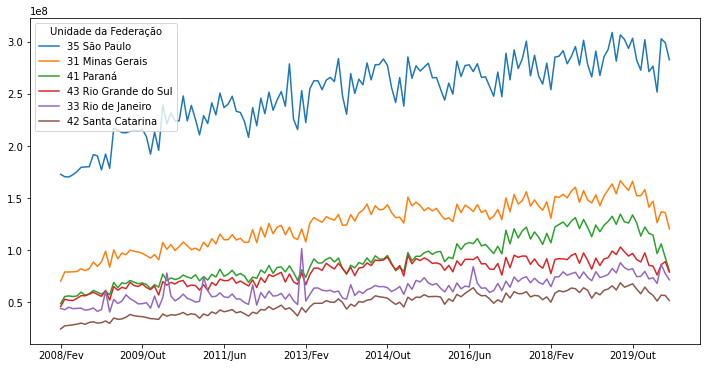

In [268]:
ordenado_total = usaveis.sort_values("Total", ascending=False)
ordenado_total = ordenado_total.index[:5].tolist()

#desafio: adicionar um novo estado de escolha aos 5 anteriores e cortar o inicio onde tem o pico de valores
#ordenado_total.append("42 Santa Catarina")
#ordenado_total["42 Santa Catarina"] = usaveis["42 Santa Catarina"]
#seis_estados = usaveis.T[ordenado_total].plot(figsize=(12,6))
#seis_estados = usaveis.drop("Total", axis=1)
#seis_estados = seis_estados.T[ordenado_total][6:].plot(figsize=(12,6))


